In [37]:
import pandas as pd

data = pd.read_csv('../../data/processed/import_declarations_intermax_daily.csv')

data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Abgabe
0,2017-01-02,439.79
1,2017-01-03,2107.94
2,2017-01-04,215.37
3,2017-01-05,0.00
4,2017-01-06,0.00
...,...,...
1040,2019-11-08,1265.71
1041,2019-11-09,0.00
1042,2019-11-10,0.00
1043,2019-11-11,0.00


In [38]:
data['Abgabe_rolling'] = data['Abgabe'].rolling(window=30).mean()

data.Abgabe_rolling.dropna()

29       414.082333
30       399.422667
31       329.158000
32       321.979000
33       321.979000
           ...     
1040    1592.881333
1041    1561.454000
1042    1429.151333
1043    1429.151333
1044    1441.451333
Name: Abgabe_rolling, Length: 1016, dtype: float64

In [39]:
X = data
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1045
Training Observations: 689
Testing Observations: 356


In [40]:
train = train.dropna(subset=['Abgabe_rolling'])

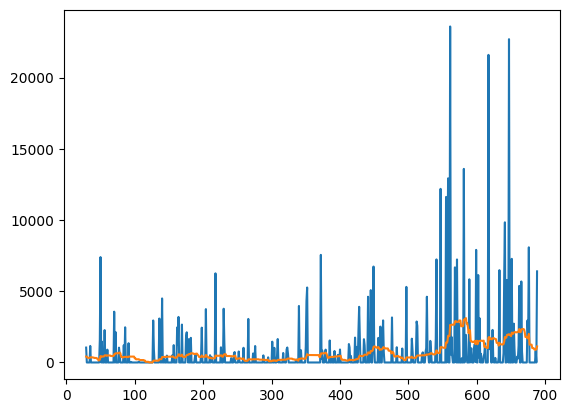

In [41]:
import matplotlib.pyplot as plt


plt.plot(train.Abgabe)
plt.plot(train.Abgabe_rolling)

In [42]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day

/tmp/ipykernel_279975/1913794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Year'] = test['Date'].dt.year
/tmp/ipykernel_279975/1913794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Month'] = test['Date'].dt.month
/tmp/ipykernel_279975/1913794.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [43]:
features = train.drop(columns=['Abgabe_rolling', 'Date', 'Abgabe'])

In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=120)
model.fit(features, train['Abgabe_rolling'])

RandomForestRegressor(random_state=120)

In [45]:
from data_preperation import get_validation_matrix

test = test.dropna(subset=['Abgabe_rolling'])
features_test = test.drop(columns=['Abgabe_rolling', 'Date', 'Abgabe'])
test_predictions = model.predict(features_test)

validation_results = get_validation_matrix(test_predictions, test['Abgabe_rolling'])
validation_results['name'] = 'RandomForrests'

In [46]:
from data_preperation import save_metrics_to_csv

save_metrics_to_csv(validation_results)

Metrics saved to metrics.csv


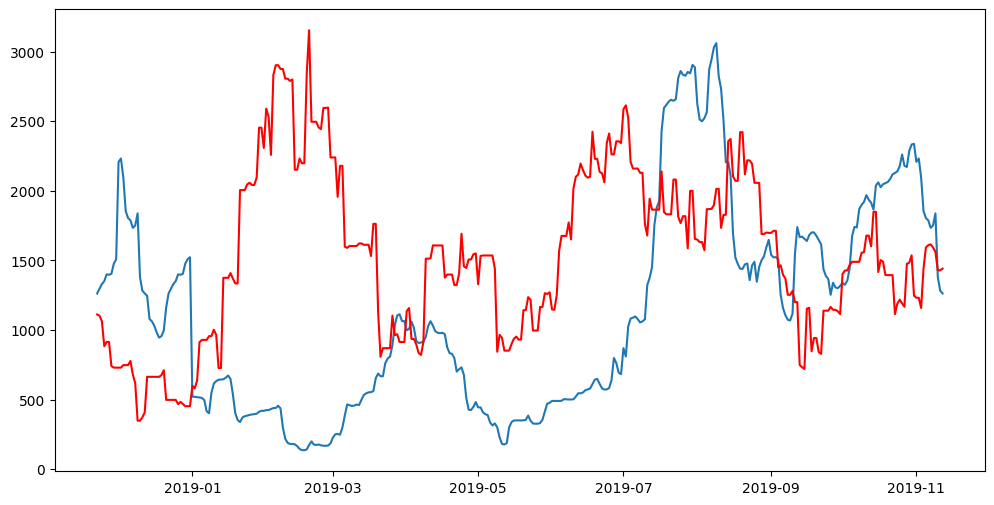

In [47]:
test_indexed = test.set_index('Date')

plt.figure(figsize=(12, 6))
plt.plot(test_indexed.index, test_predictions)
plt.plot(test_indexed.index, test_indexed['Abgabe_rolling'], label='Actual', color='red')

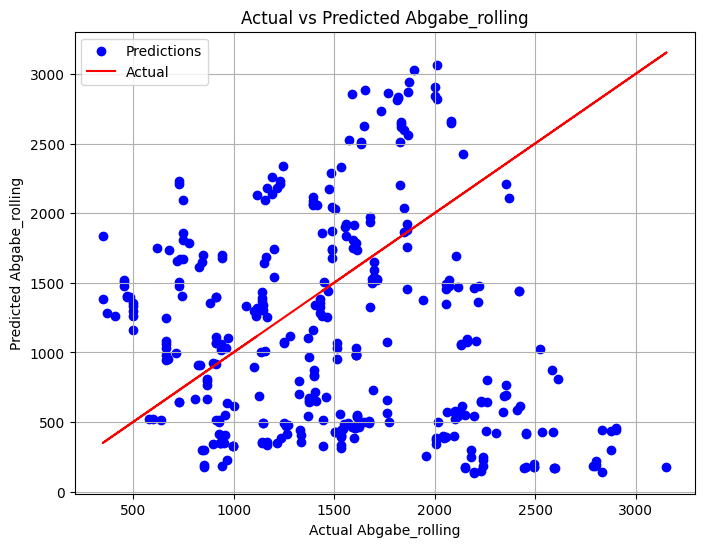

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(test['Abgabe_rolling'], test_predictions, color='blue', label='Predictions')
plt.plot(test['Abgabe_rolling'], test['Abgabe_rolling'], color='red', label='Actual')  # Plotting the identity line
plt.title('Actual vs Predicted Abgabe_rolling')
plt.xlabel('Actual Abgabe_rolling')
plt.ylabel('Predicted Abgabe_rolling')
plt.legend()
plt.grid(True)
plt.show()